# Setup

Since [Pandas](https://pandas.pydata.org/) is almost a one stop shop for everything data analysis in python anyway, most plotting is done using `df.plot()` syntax, however, you must import [Matplotlib](https://matplotlib.org/index.html) since this is a dependency. I would also recommend installing [Seaborn](https://seaborn.pydata.org/) for more interesting plot types and statistical features. Plus it has a nice native style.

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn

## Display

Couple options for visualizing in a Jupyter Notebook. Either present static charts `inline`, embed them as interactive elements using `notebook` setting, or open the chart in a new windows from backend usiing `gtk`.  [source](http://ipython.readthedocs.io/en/stable/interactive/plotting.html)

In [2]:
#%matplotlib inline
%matplotlib notebook
#%matplotlib gtk

## Style

Call `plt.style.available` to show options, then set the style of choice.

In [3]:
plt.style.use('seaborn-white')

# Visualizations

## Dummy Data

In [4]:
df = pd.DataFrame(data=np.random.rand(24,4),
                  index=pd.date_range(end=pd.datetime.now(), periods=24, freq='MS'),
                  columns=['A', 'B', 'C', 'D'])

In [5]:
df.head()

,A,B,C,D
2015-09-01 16:26:23.866539,0.553922,0.903206,0.711994,0.213025
2015-10-01 16:26:23.866539,0.419103,0.511029,0.378712,0.879817
2015-11-01 16:26:23.866539,0.822016,0.427490,0.274673,0.823007
2015-12-01 16:26:23.866539,0.558232,0.462380,0.971343,0.728502
2016-01-01 16:26:23.866539,0.740547,0.693441,0.700683,0.365773


## Plot Categorical Data Over Time

<IPython.core.display.Javascript object>


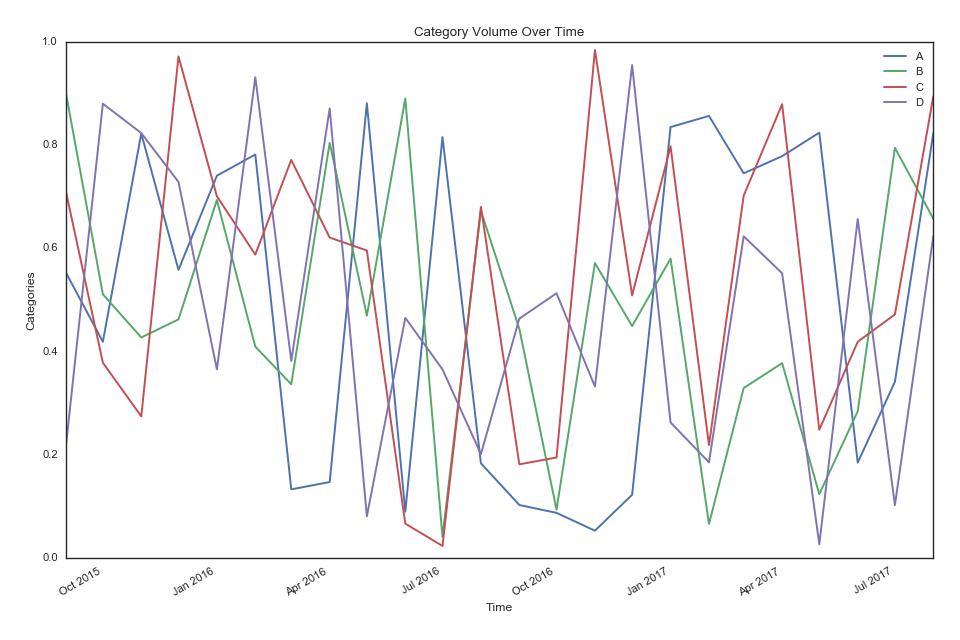

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

df.plot(ax=ax)

ax.set(ylabel='Categories', xlabel='Time', title='Category Volume Over Time')

fig.tight_layout(pad=2)
fig.show()

fig.savefig('category_volume_over_time.png', transparent=True, dpi=300, bbox_inches='tight')

## Transform

Group data over time periods. Refer to [Pandas Offset Aliases](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)  

In [7]:
df = df.groupby(pd.TimeGrouper('1A')).sum()

In [8]:
df.head()

,A,B,C,D
2015-12-31,2.353273,2.304105,2.336722,2.644351
2016-12-31,4.141086,5.877128,5.916953,5.927826
2017-12-31,5.387688,3.214446,4.631758,3.034320


## Plot Categorical Data Over Time Groups

<IPython.core.display.Javascript object>


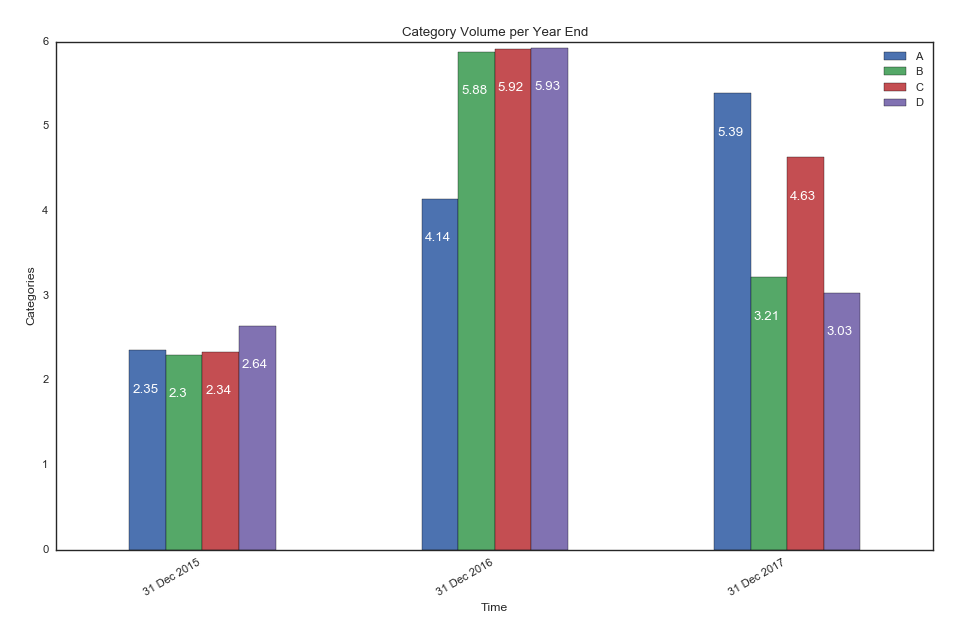

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

df.plot(kind='bar', ax=ax)

ax.set(ylabel='Categories', xlabel='Time', title='Category Volume per Year End')

# auto format xaxis labels as date
fig.autofmt_xdate()

# custom format xaxis date labels
# current bug in pandas doesn't allow the following
# see https://github.com/pandas-dev/pandas/issues/1918
#ax.xaxis_date()
#ax.xaxis.set_major_locator(mpl.dates.YearLocator())
#ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d %b %Y'))
# so instead we manually set xaxis labels to our custom formatted df index as series of strings
ax.xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime('%d %b %Y')))

# annotate data labels onto vertical bars
# see https://matplotlib.org/users/annotations_guide.html
for bar,(col,ix) in zip(ax.patches, pd.MultiIndex.from_product([df.columns,df.index])):
    ax.annotate(str(round(df.loc[ix,col],2)), xy=(bar.get_x()+.01, bar.get_height()-.5), color='white')

fig.tight_layout(pad=2)
fig.show()

fig.savefig('category_volume_per_year_end.png', transparent=True, dpi=300, bbox_inches='tight')